# Linear transformations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import pyreadstat
from utils import sim, standardize, plot_model_coefs
%load_ext autoreload
%autoreload 2

## Standardizing with interactions

In [15]:
data_folder = 'data/child.iq/'
data_iq, meta = pyreadstat.read_dta(data_folder + 'kidiq.dta')
# Adding interactions: mom_hs*mom_iq
# add a column in the dataframe for the new interaction
data_iq['hs_iq'] = data_iq['mom_hs']*data_iq['mom_iq'] 

# add constant (ones vector)
Xa = sm.add_constant(data_iq[['mom_hs', 'mom_iq','hs_iq']])  

# linear regression +  parameters of the model
model = sm.OLS(data_iq.kid_score, Xa)
res_OLS = model.fit()
params = res_OLS.params
res_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     42.84
Date:                Mon, 27 Apr 2020   Prob (F-statistic):           3.07e-24
Time:                        09:18:03   Log-Likelihood:                -1867.5
No. Observations:                 434   AIC:                             3743.
Df Residuals:                     430   BIC:                             3759.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.4820     13.758     -0.835      0.404     -38.523      15.559
mom_hs        51.2682     15.338      3.343      0.001      21.122      81.414
mom_iq         0.9689      0.148      6.531      0.000       0.677       1.260
hs_iq         -0.4843      0.162     -2.985      0.003      -0.803      -0.165
==============================================================================
Omnibus:                        8.014   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.258
Skew:                          -0.333   Prob(JB):                       0.0161
Kurtosis:                       2.887   Cond. No.                     3.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

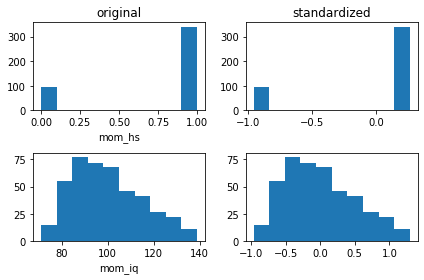

In [77]:
stVars = standardize(data_iq[['mom_hs', 'mom_iq']])
stVars['hs:iq'] = stVars.mom_hs * stVars.mom_iq
stXa = sm.add_constant(stVars)

fig, axs = plt.subplots(ncols=2, nrows=2, sharey=False)
axs[0, 0].hist(data_iq.mom_hs)
axs[0, 1].hist(stVars.mom_hs);
axs[1, 0].hist(data_iq.mom_iq)
axs[1, 1].hist(stVars.mom_iq)
axs[0, 0].set_title('original')
axs[0, 1].set_title('standardized')
axs[0, 0].set_xlabel('mom_hs')
axs[1, 0].set_xlabel('mom_iq')
plt.tight_layout()

In [5]:
# linear regression +  parameters of the model
model = sm.OLS(data_iq.kid_score, stXa)
res_OLS = model.fit()
params = res_OLS.params
res_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     42.84
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           3.07e-24
Time:                        19:46:52   Log-Likelihood:                -1867.5
No. Observations:                 434   AIC:                             3743.
Df Residuals:                     430   BIC:                             3759.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.6389      0.908     96.565      0.000      85.855      89.423
mom_hs         2.3340      1.994      1.171      0.242      -1.585       6.253
mom_iq        17.6516      1.817      9.712      0.000      14.079      21.224
hs:iq        -11.9364      3.998     -2.985      0.003     -19.795      -4.078
==============================================================================
Omnibus:                        8.014   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.258
Skew:                          -0.333   Prob(JB):                       0.0161
Kurtosis:                       2.887   Cond. No.                         4.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Standardized variables and correlation

In [35]:
st_kid_score = standardize(data_iq.kid_score) #(data_iq.kid_score - data_iq.kid_score.mean()) / data_iq.kid_score.std()
st_mom_iq = standardize(data_iq.mom_iq) #(data_iq.mom_iq - data_iq.mom_iq.mean()) / data_iq.mom_iq.std()
stXa = sm.add_constant(st_mom_iq)

# linear regression +  parameters of the model
model = sm.OLS(st_kid_score, stXa)
res_OLS = model.fit()
params = res_OLS.params
res_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     108.6
Date:                Mon, 27 Apr 2020   Prob (F-statistic):           7.66e-23
Time:                        09:36:56   Log-Likelihood:                -265.81
No. Observations:                 434   AIC:                             535.6
Df Residuals:                     432   BIC:                             543.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.422e-16      0.021  -6.62e-15      1.000      -0.042       0.042
mom_iq         0.4483      0.043     10.423      0.000       0.364       0.533
==============================================================================
Omnibus:                        7.545   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.735
Skew:                          -0.324   Prob(JB):                       0.0209
Kurtosis:                       2.919   Cond. No.                         2.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log transformations

## Regression of earnings on heights

In [37]:
data_folder = 'data/earnings/'
data_df, meta = pyreadstat.read_dta(data_folder + 'heights.dta')
# remove NaNs
data_df = data_df.dropna()

Linear model, intercept: 5.78, slope: 0.06


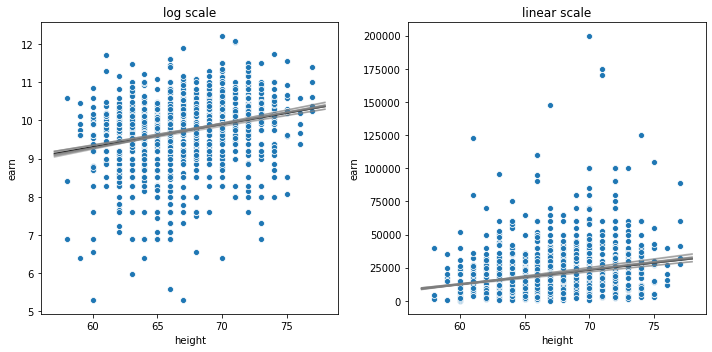

In [38]:
# remove earnings of 0
data_df = data_df[data_df.earn!=0]
y = np.log(data_df.earn)  # define dependent variable
Xa = sm.add_constant(data_df['height'])  # add ones vector
model = sm.OLS(y, Xa)  # define model
res_OLS = model.fit()
params = res_OLS.params
print("Linear model, intercept: %.2f, slope: %.2f" %(params[0], params[1]))
# get betas distribution
n_sim = 10
betas_sim = sim(res_OLS, size=n_sim)
fig, axs = plt.subplots(ncols=2, figsize=[10, 5])
# plot data
g = sns.scatterplot(x=data_df.height, y=y, ax=axs[0])
# get extreme x-axis points to plot the regression line
xx = np.array(axs[0].get_xlim())
# plot regression line
axs[0].plot(xx, params.const+xx*params.height, color='k');
for i in range(n_sim):
    axs[0].plot(xx, betas_sim[i, 0]+xx*betas_sim[i, 1], color='grey', alpha=0.5)
g = sns.scatterplot(data=data_df, x='height', y='earn', ax=axs[1])
# get extreme x-axis points to plot the regression line
xx = np.array(axs[1].get_xlim())
# plot regression line
axs[1].plot(xx, np.exp(params.const + xx*params.height), color='k');
for i in range(n_sim):
    axs[1].plot(xx, np.exp(betas_sim[i, 0] + xx*betas_sim[i, 1]), color='grey', alpha=0.5)
axs[0].set_title('log scale')
axs[1].set_title('linear scale')
plt.tight_layout()

## Log model with interactions and standardized variables

In [49]:
st_height = standardize(data_df.height, scale_factor=1)
male = np.abs(data_df.sex - 2)  # converts sex variable into male variable
stVars = pd.concat([st_height, male], axis=1, keys=['height', 'male'])
stVars['height:male'] = st_height * male
Xa = sm.add_constant(stVars)  # add ones vector
model = sm.OLS(y, Xa)  # define model
res_OLS = model.fit()
res_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     37.58
Date:                Mon, 27 Apr 2020   Prob (F-statistic):           3.32e-23
Time:                        09:52:33   Log-Likelihood:                -1538.6
No. Observations:                1192   AIC:                             3085.
Df Residuals:                    1188   BIC:                             3106.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.5266      0.045    210.878      0.000       9.438       9.615
height          0.0654      0.050      1.304      0.193      -0.033       0.164
male            0.4197      0.073      5.748      0.000       0.276       0.563
height:male     0.0286      0.072      0.400      0.690      -0.112       0.169
==============================================================================
Omnibus:                      225.961   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              463.655
Skew:                          -1.089   Prob(JB):                    2.08e-101
Kurtosis:                       5.143   Cond. No.                         4.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Indicator variables

Be careful! Statsmodels does not remove the baseline factor level, so there is multicollinearity in the data!!!


In [67]:
factor_mom_work = sm.tools.categorical(data_iq.mom_work, drop=True)
factor_mom_work = factor_mom_work.rename(columns={1: 'mom_work1', 2: 'mom_work2', 3: 'mom_work3', 4: 'mom_work4'})
# add constant (ones vector)
Xa = sm.add_constant(factor_mom_work)  

# linear regression +  parameters of the model
model = sm.OLS(data_iq.kid_score, Xa)
res_OLS = model.fit()
params = res_OLS.params
res_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.590
Date:                Mon, 27 Apr 2020   Prob (F-statistic):             0.0138
Time:                        10:13:58   Log-Likelihood:                -1918.9
No. Observations:                 434   AIC:                             3846.
Df Residuals:                     430   BIC:                             3862.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.7128      0.869     80.215      0.000      68.005      71.421
mom_work1     12.2872      1.986      6.187      0.000       8.384      16.191
mom_work2     16.1414      1.820      8.868      0.000      12.564      19.719
mom_work3     23.7872      2.267     10.492      0.000      19.331      28.243
mom_work4     17.4970      1.398     12.520      0.000      14.750      20.244
==============================================================================
Omnibus:                       12.371   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.950
Skew:                          -0.411   Prob(JB):                      0.00154
Kurtosis:                       2.796   Cond. No.                     5.25e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.12e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**We have to choose and remove the baseline ourselves.**

So we remove first factor as baseline.

In [81]:
# add constant (ones vector)
Xa = sm.add_constant(factor_mom_work.drop(columns=['mom_work1'], axis=1))  

# linear regression +  parameters of the model
model = sm.OLS(data_iq.kid_score, Xa)
res_OLS = model.fit()
params = res_OLS.params
res_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.590
Date:                Mon, 27 Apr 2020   Prob (F-statistic):             0.0138
Time:                        12:49:43   Log-Likelihood:                -1918.9
No. Observations:                 434   AIC:                             3846.
Df Residuals:                     430   BIC:                             3862.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.0000      2.305     35.568      0.000      77.469      86.531
mom_work2      3.8542      3.095      1.245      0.214      -2.229       9.937
mom_work3     11.5000      3.553      3.237      0.001       4.517      18.483
mom_work4      5.2098      2.704      1.927      0.055      -0.105      10.524
==============================================================================
Omnibus:                       12.371   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.950
Skew:                          -0.411   Prob(JB):                      0.00154
Kurtosis:                       2.796   Cond. No.                         5.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exercises

### Exercise 2

In [87]:
data_folder = 'data/earnings/'
data_df, meta = pyreadstat.read_dta(data_folder + 'heights.dta')
# remove NaNs
data_df = data_df.dropna()

Cleaning and refactoring of variables...

In [88]:
data_df['male'] = 2 - data_df['sex']
data_df['hispanic'] = 2 - data_df['hisp']
data_df['age'] = 90 - data_df['yearbn']
# there are three respondent with birth year 99 which would be after 
# the year of the survey but they are probably born in 1899 since there are already some respondents born in 1901 
data_df.loc[data_df.age < 0, 'age'] = data_df.loc[data_df.age < 0].age + 100
factor_race = sm.tools.categorical(data_df, col='race', drop=True)
factor_race = factor_race.rename(columns={1: 'white', 2: 'black', 3: 'asian', 4: 'native', 9: 'other'})
factor_race = factor_race.drop(columns='other')
data_df = pd.concat([data_df, factor_race.set_index(data_df.index)], axis=1)


In [91]:
data_df.keys()

Index(['earn', 'height1', 'height2', 'sex', 'race', 'hisp', 'ed', 'yearbn',
       'height', 'male', 'hispanic', 'age', 'white', 'black', 'asian',
       'native'],
      dtype='object')

Simple linear model where the intercept is the average earning for people with average height.

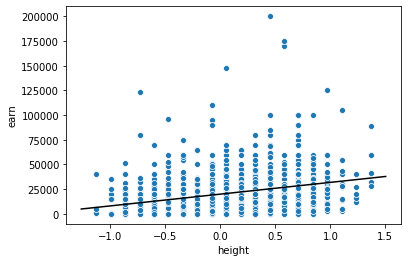

In [172]:
y = data_df.earn  # define dependent variable
zXa = sm.add_constant(standardize(data_df['height']))  # add ones vector
model = sm.OLS(y, zXa)  # define model
res_OLS = model.fit()
params = res_OLS.params
# plot data
fig, ax = plt.subplots()
g = sns.scatterplot(x=zXa.height, y=y, ax=ax)
# get extreme x-axis points to plot the regression line
xx = np.array(ax.get_xlim())
# plot regression line
ax.plot(xx, params.const+xx*params.height, color='k');

In [173]:
params.const

20014.858593183468

__Multivariate model__
* we hope race is not relevant and coefficients are indeed not significant so they are excluded from the model
* sqrt slightly increases R^2 but complicates interpretation so we stay with linear
* interaction between ed and age is not significant so is not included
* data are heteroscedastic but that's not too bad (better use WLS)

In [92]:
# remove earnings of 0
#data_df = data_df[data_df.earn!=0]
y = data_df.earn  # define dependent variable
X = standardize(data_df.loc[:, ['height', 'male', 'age', 'ed', 'white', 'black', 'asian', 'native']], scale_factor=2)
X['male:ed'] = X.ed * X.male
X['male:age'] = X.age * X.male
#X['ed:age'] = X.age * X.ed
zXa = sm.add_constant(X)  # add ones vector
model = sm.OLS(y, zXa)  # define model
res_OLS = model.fit()
params = res_OLS.params
res_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     48.55
Date:                Mon, 25 May 2020   Prob (F-statistic):           2.64e-83
Time:                        11:41:46   Log-Likelihood:                -15387.
No. Observations:                1379   AIC:                         3.080e+04
Df Residuals:                    1368   BIC:                         3.085e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.002e+04    460.730     43.448      0.000    1.91e+04    2.09e+04
height      3340.1971   1322.053      2.527      0.012     746.726    5933.668
male        1.106e+04   1307.660      8.458      0.000    8495.001    1.36e+04
age         5593.4628    937.256      5.968      0.000    3754.848    7432.078
ed          1.318e+04    938.695     14.045      0.000    1.13e+04     1.5e+04
white        318.7526   4908.716      0.065      0.948   -9310.673    9948.179
black       -467.3880   4493.505     -0.104      0.917   -9282.295    8347.519
asian        338.8101   1964.858      0.172      0.863   -3515.652    4193.272
native      -825.0378   1638.938     -0.503      0.615   -4040.142    2390.066
male:ed     5136.2966   1845.452      2.783      0.005    1516.074    8756.519
male:age    4704.0603   1852.906      2.539      0.011    1069.216    8338.905
==============================================================================
Omnibus:                      822.402   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12845.241
Skew:                           2.470   Prob(JB):                         0.00
Kurtosis:                      17.112   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

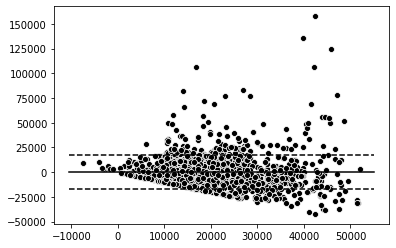

In [22]:
# scatter plot of residuals
rs = res_OLS.resid
pred_train = res_OLS.predict(zXa)
plt.figure()
sns.scatterplot(x=pred_train, y=rs, color = 'k')
# mean and +- 1 std
xx = plt.xlim()
plt.plot(xx, [rs.mean(), rs.mean()], 'k')
plt.plot(xx, [rs.mean()-rs.std(), rs.mean()-rs.std()], 'k--')
plt.plot(xx, [rs.mean()+rs.std(), rs.mean()+rs.std()], 'k--');

### Exercise 4

In [2]:
data_folder = 'data/pollution/'
data_df, meta = pyreadstat.read_dta(data_folder + 'pollution.dta')
# remove NaNs
data_df = data_df.dropna()

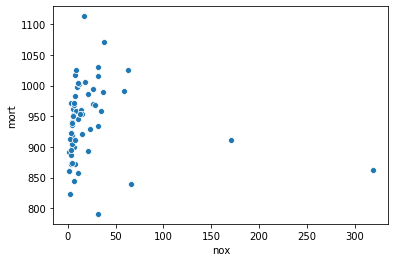

In [7]:
sns.scatterplot(data=data_df, x='nox', y='mort') 

Text(0.5, 1.0, 'residual plot')

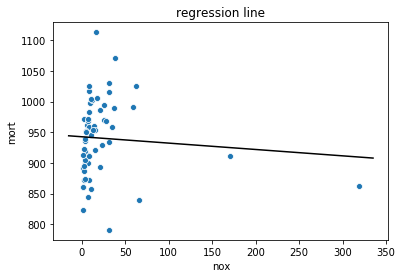

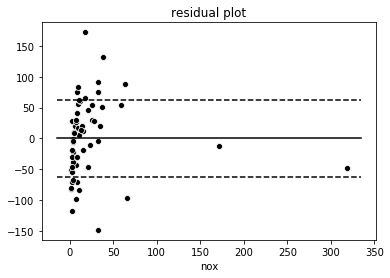

In [68]:
y = data_df.mort  # define dependent variable
zXa = sm.add_constant(data_df['nox'])  # add ones vector
model = sm.OLS(y, zXa)  # define model
res_OLS = model.fit()
params = res_OLS.params
# plot data
fig, ax = plt.subplots()
g = sns.scatterplot(x=zXa.nox, y=y, ax=ax)
# get extreme x-axis points to plot the regression line
xx = np.array(ax.get_xlim())
# plot regression line
ax.plot(xx, params.const+xx*params.nox, color='k')
ax.set_title('regression line')
# scatter plot of residuals
rs = res_OLS.resid
pred_train = res_OLS.predict(zXa)
plt.figure()
sns.scatterplot(x=data_df.nox, y=rs, color = 'k')
# mean and +- 1 std
xx = plt.xlim()
plt.plot(xx, [rs.mean(), rs.mean()], 'k')
plt.plot(xx, [rs.mean()-rs.std(), rs.mean()-rs.std()], 'k--')
plt.plot(xx, [rs.mean()+rs.std(), rs.mean()+rs.std()], 'k--')
plt.title('residual plot')

Using the log of the independent variable solves the problem of skewness. Using log of dependent variable allows to interpret the coefficient as % increment in y for % increment in x. Thus when NOX doubles mortality increases by approx. 2%.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mort   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     5.085
Date:                Mon, 18 May 2020   Prob (F-statistic):             0.0279
Time:                        17:16:10   Log-Likelihood:                 80.703
No. Observations:                  60   AIC:                            -157.4
Df Residuals:                      58   BIC:                            -153.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8072      0.018    370.975      0.000       6.770       6.844
nox            0.0159      0.007      2.255      0.028       0.002       0.030
==============================================================================
Omnibus:                        4.778   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                3.844
Skew:                          -0.485   Prob(JB):                        0.146
Kurtosis:                       3.773   Cond. No.                         6.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

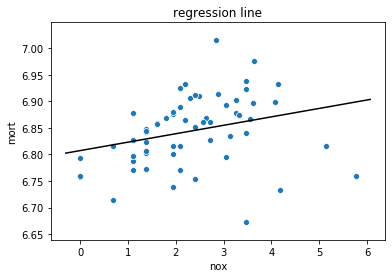

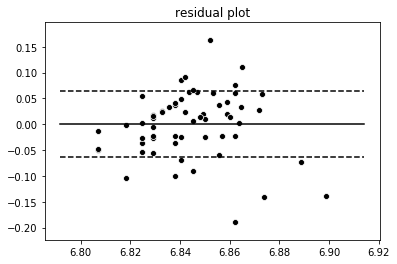

In [69]:
y = np.log(data_df.mort)  # define dependent variable
zXa = sm.add_constant(np.log(data_df['nox']))  # add ones vector
model = sm.OLS(y, zXa)  # define model
res_OLS = model.fit()
params = res_OLS.params
# plot data
fig, ax = plt.subplots()
g = sns.scatterplot(x=zXa.nox, y=y, ax=ax)
# get extreme x-axis points to plot the regression line
xx = np.array(ax.get_xlim())
# plot regression line
ax.plot(xx, params.const+xx*params.nox, color='k')
ax.set_title('regression line')
# scatter plot of residuals
rs = res_OLS.resid
pred_train = res_OLS.predict(zXa)
plt.figure()
sns.scatterplot(x=pred_train, y=rs, color = 'k')
# mean and +- 1 std
xx = plt.xlim()
plt.plot(xx, [rs.mean(), rs.mean()], 'k')
plt.plot(xx, [rs.mean()-rs.std(), rs.mean()-rs.std()], 'k--')
plt.plot(xx, [rs.mean()+rs.std(), rs.mean()+rs.std()], 'k--')
plt.title('residual plot')
res_OLS.summary()

d) All variables have a very wide scale so the log is appropriate.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mort   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     7.449
Date:                Mon, 18 May 2020   Prob (F-statistic):           0.000278
Time:                        17:16:19   Log-Likelihood:                 88.255
No. Observations:                  60   AIC:                            -168.5
Df Residuals:                      56   BIC:                            -160.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8267      0.023    300.726      0.000       6.781       6.872
nox            0.0598      0.023      2.599      0.012       0.014       0.106
hc            -0.0608      0.021     -2.959      0.005      -0.102      -0.020
so2            0.0143      0.008      1.887      0.064      -0.001       0.030
==============================================================================
Omnibus:                        7.949   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                8.038
Skew:                           0.611   Prob(JB):                       0.0180
Kurtosis:                       4.312   Cond. No.                         24.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

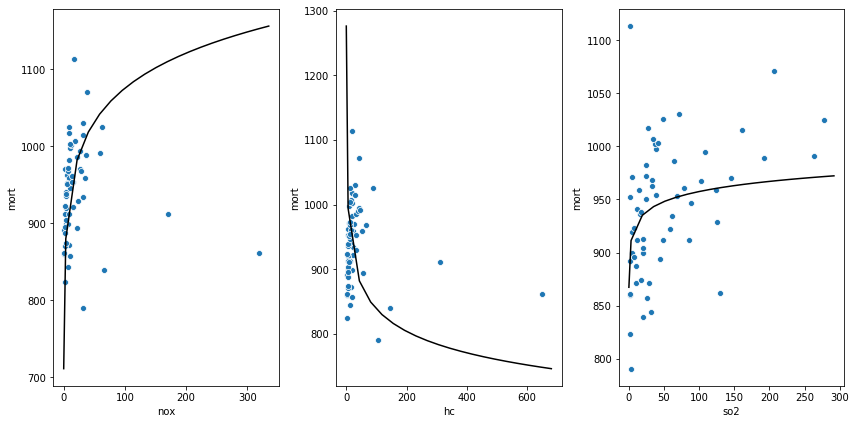

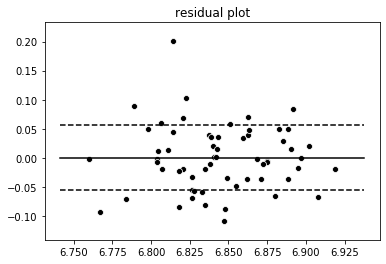

In [70]:
y = np.log(data_df.mort)  # define dependent variable
zXa = sm.add_constant(np.log(data_df[['nox', 'hc', 'so2']])) # add ones vector
model = sm.OLS(y, zXa)  # define model
res_OLS = model.fit()
params = res_OLS.params
fig, axs = plt.subplots(ncols=3, figsize=[12, 6])
sns.scatterplot(x=data_df.nox, y=data_df.mort, ax=axs[0])
xx = np.linspace(axs[0].get_xlim()[0], axs[0].get_xlim()[1], 20)
xx[0] = max(0.1, xx[0])
axs[0].plot(xx, np.exp(params.const + np.log(xx)*params.nox +
                           zXa.hc.mean() * params.hc +
                           zXa.so2.mean() * params.so2), color='k')
sns.scatterplot(x=data_df.hc, y=data_df.mort, ax=axs[1])
xx = np.linspace(axs[1].get_xlim()[0], axs[1].get_xlim()[1], 20)
xx[0] = max(0.1, xx[0])
axs[1].plot(xx, np.exp(params.const + np.log(xx)*params.hc +
                           zXa.nox.mean() * params.nox +
                           zXa.so2.mean() * params.so2), color='k')
sns.scatterplot(x=data_df.so2, y=data_df.mort, ax=axs[2])
xx = np.linspace(axs[2].get_xlim()[0], axs[2].get_xlim()[1], 20)
xx[0] = max(0.1, xx[0])
axs[2].plot(xx, np.exp(params.const + np.log(xx)*params.so2 +
                           zXa.nox.mean() * params.nox +
                           zXa.hc.mean() * params.hc), color='k')
plt.tight_layout()
# scatter plot of residuals
rs = res_OLS.resid
pred_train = res_OLS.predict(zXa)
plt.figure()
sns.scatterplot(x=pred_train, y=rs, color = 'k')
# mean and +- 1 std
xx = plt.xlim()
plt.plot(xx, [rs.mean(), rs.mean()], 'k')
plt.plot(xx, [rs.mean()-rs.std(), rs.mean()-rs.std()], 'k--')
plt.plot(xx, [rs.mean()+rs.std(), rs.mean()+rs.std()], 'k--')
plt.title('residual plot')
res_OLS.summary()

e) cross-validation just splitting the dataset in two...

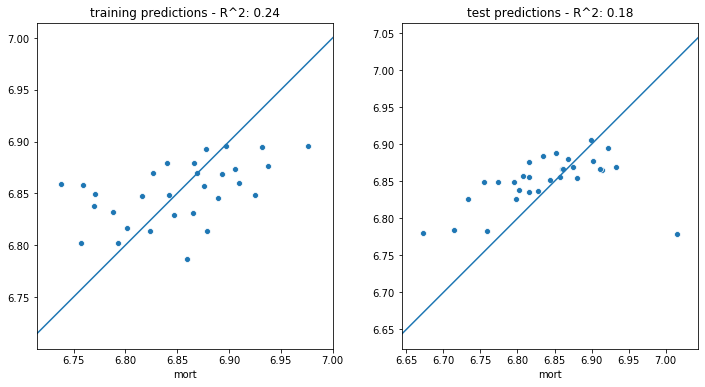

In [5]:
from sklearn.metrics import r2_score

y = np.log(data_df.mort)  # define dependent variable
zXa = sm.add_constant(np.log(data_df[['nox', 'hc', 'so2']])) # add ones vector
n_samples = zXa.shape[0]
train_idx = np.arange(0, int(n_samples/2))
test_idx = np.arange(int(n_samples/2), n_samples)
Xtrain = zXa.iloc[train_idx, :]
Xtest = zXa.iloc[test_idx, :]
model = sm.OLS(y[train_idx], Xtrain)  # define model
res_OLS = model.fit()
predictions_train = res_OLS.predict(Xtrain)
predictions_test = res_OLS.predict(Xtest)
r2_train = r2_score(y_true=y[train_idx], y_pred=predictions_train)
r2_test = r2_score(y_true=y[test_idx], y_pred=predictions_test)
fig, axs = plt.subplots(ncols=2, figsize=[12, 6])
sns.scatterplot(x=y[train_idx], y=predictions_train, ax=axs[0])
axs[0].set_aspect('equal')
xlims = axs[0].get_xlim()
axs[0].plot(xlims, xlims)
axs[0].set_xlim(xlims)
axs[0].set_title('training predictions - R^2: {:.2f}'.format(r2_train))
sns.scatterplot(x=y[test_idx], y=predictions_test, ax=axs[1])
axs[1].set_aspect('equal')
xlims = axs[1].get_xlim()
axs[1].plot(xlims, xlims)
axs[1].set_xlim(xlims)
axs[1].set_title('test predictions - R^2: {:.2f}'.format(r2_test));

and using scikit-learn cross-validation tools

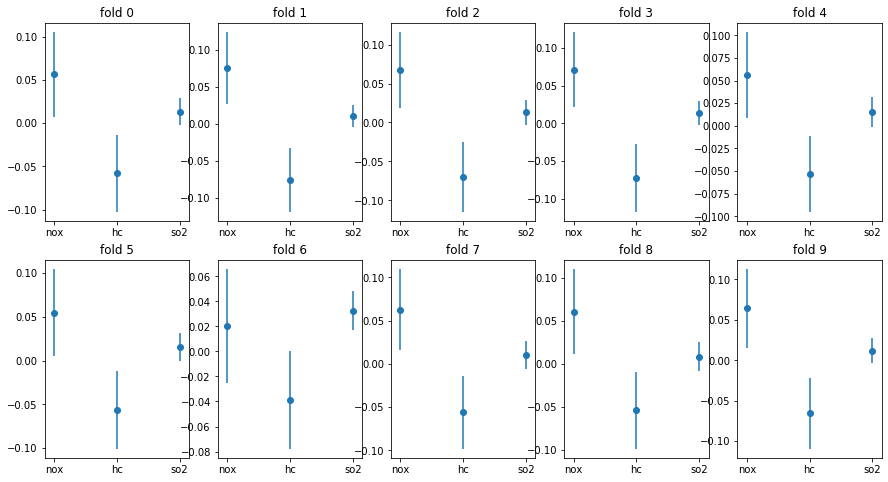

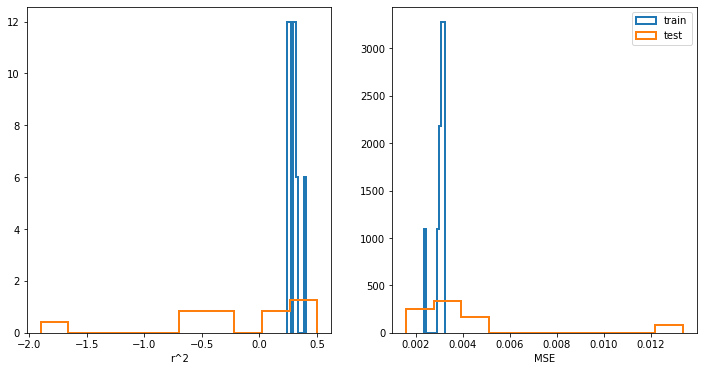

In [34]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

y = np.log(data_df.mort)  # define dependent variable
zXa = sm.add_constant(np.log(data_df[['nox', 'hc', 'so2']])) # add ones vector
nfolds = 10
cv = KFold(n_splits=nfolds, shuffle=False)
r2_train = np.zeros(nfolds)
r2_test = np.zeros(nfolds)
mse_train = np.zeros(nfolds)
mse_test = np.zeros(nfolds)
n_cols = int(nfolds/2)
fig2, axs2 = plt.subplots(nrows=2, ncols=n_cols, figsize=[15, 8])
for i, (train_idx, test_idx) in enumerate(cv.split(zXa)):
    Xtrain = zXa.iloc[train_idx, :]
    Xtest = zXa.iloc[test_idx, :]
    model = sm.OLS(y[train_idx], Xtrain)  # define model
    res_OLS = model.fit()
    predictions_train = res_OLS.predict(Xtrain)
    predictions_test = res_OLS.predict(Xtest)
    r2_train[i] = r2_score(y_true=y[train_idx], y_pred=predictions_train)
    r2_test[i] = r2_score(y_true=y[test_idx], y_pred=predictions_test)
    mse_train[i] = mean_squared_error(y_true=y[train_idx], y_pred=predictions_train)
    mse_test[i] = mean_squared_error(y_true=y[test_idx], y_pred=predictions_test)
    plot_model_coefs(res_OLS, ax=axs2[int(i/n_cols), i%n_cols])
    axs2[int(i/n_cols), i%n_cols].set_title('fold {:d}'.format(i))
fig, axs = plt.subplots(ncols=2, figsize=[12, 6])
axs[0].hist(r2_train, density=True, linewidth=2, histtype='step', label='train')
axs[0].hist(r2_test, density=True, linewidth=2, histtype='step', label='test')
axs[1].hist(mse_train, density=True, linewidth=2, histtype='step', label='train')
axs[1].hist(mse_test, density=True, linewidth=2, histtype='step', label='test')
plt.legend()
axs[0].set_xlabel('r^2')
axs[1].set_xlabel('MSE');

### Exercise 8

In [37]:
data_folder = 'data/beauty/'
data_df = pd.read_csv(data_folder + 'ProfEvaltnsBeautyPublic.csv')

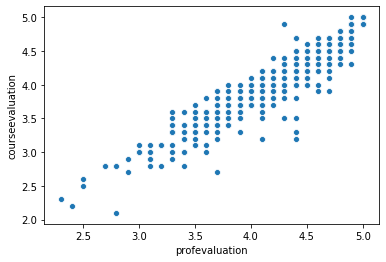

In [46]:
sns.scatterplot(data_df.profevaluation, data_df.courseevaluation)

In [84]:
#subset_data = data_df[['tenured', 'profnumber', 'minority', 'age', 'beautyf2upper',
#       'beautyflowerdiv', 'beautyfupperdiv', 'beautym2upper',
#       'beautymlowerdiv', 'beautymupperdiv', 'btystdave', 'btystdf2u',
#     'didevaluation', 'female', 'formal', 'fulldept', 'lower',
#       'multipleclass', 'nonenglish', 'onecredit', 'percentevaluating',
#       'profevaluation', 'students', 'tenuretrack', 'blkandwhite',
#       'btystdvariance', 'btystdavepos', 'btystdaveneg']]
subset_data = data_df[['profevaluation', 'female', 'nonenglish', 'percentevaluating']]
y = data_df['courseevaluation']
zdata = standardize(subset_data)
zdata['profevaluation:female'] = zdata.profevaluation * zdata.female
zdata['profevaluation:nonenglish'] = zdata.profevaluation * zdata.nonenglish
zXa = sm.add_constant(zdata)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     580.5
Date:                Mon, 25 May 2020   Prob (F-statistic):          6.48e-210
Time:                        10:56:46   Log-Likelihood:                 115.41
No. Observations:                 463   AIC:                            -216.8
Df Residuals:                     456   BIC:                            -187.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         3.9917      0.009    444.076      0.000       3.974       4.009
profevaluation                1.0156      0.019     54.888      0.000       0.979       1.052
female                       -0.0412      0.018     -2.295      0.022      -0.077      -0.006
nonenglish                   -0.0657      0.020     -3.278      0.001      -0.105      -0.026
percentevaluating             0.0646      0.018      3.558      0.000       0.029       0.100
profevaluation:female        -0.1197      0.035     -3.377      0.001      -0.189      -0.050
profevaluation:nonenglish    -0.0998      0.045     -2.239      0.026      -0.187      -0.012
==============================================================================
Omnibus:                       61.614   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.109
Skew:                          -0.699   Prob(JB):                     8.40e-32
Kurtosis:                       5.338   Cond. No.                         5.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

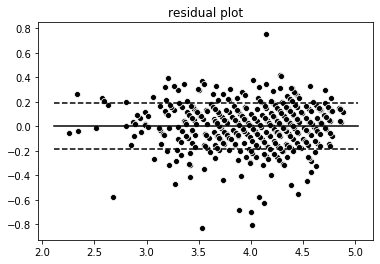

In [85]:
model = sm.OLS(y, zXa)  # define model
res_OLS = model.fit()
# scatter plot of residuals
rs = res_OLS.resid
pred_train = res_OLS.predict(zXa)
plt.figure()
sns.scatterplot(x=pred_train, y=rs, color = 'k')
# mean and +- 1 std
xx = plt.xlim()
plt.plot(xx, [rs.mean(), rs.mean()], 'k')
plt.plot(xx, [rs.mean()-rs.std(), rs.mean()-rs.std()], 'k--')
plt.plot(xx, [rs.mean()+rs.std(), rs.mean()+rs.std()], 'k--')
plt.title('residual plot')
res_OLS.summary()